In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\SACHIN\OneDrive\Desktop\Mini Project\PS_transaction_log.csv",encoding='ISO-8859-1')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [4]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [7]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [10]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [11]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'CASH_IN': np.int64(0),
 'CASH_OUT': np.int64(1),
 'DEBIT': np.int64(2),
 'PAYMENT': np.int64(3),
 'TRANSFER': np.int64(4)}

In [12]:
mapping={'CASH_IN': np.int64(0),
 'CASH_OUT': np.int64(1),
 'DEBIT': np.int64(2),
 'PAYMENT': np.int64(3),
 'TRANSFER': np.int64(4)}

mapping = {k: int(v) for k, v in mapping.items()}
print(mapping)

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB


In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']])

x=pd.DataFrame(scaled_features, columns=['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'])

In [15]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [16]:
model=IsolationForest(n_estimators=100,contamination=0.002,random_state=42)
model.fit(x)

,n_estimators,100
,max_samples,'auto'
,contamination,0.002
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [17]:
pred=model.predict(x)

In [18]:
df['anomaly'] = np.where(pred == -1, 1, 0)

In [19]:
print(confusion_matrix(df['isFraud'], df['anomaly']))
print(classification_report(df['isFraud'], df['anomaly']))

[[6341779   12628]
 [   8123      90]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6354407
           1       0.01      0.01      0.01      8213

    accuracy                           1.00   6362620
   macro avg       0.50      0.50      0.50   6362620
weighted avg       1.00      1.00      1.00   6362620



C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2400\527949193.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts.values, palette=['#4CAF50', '#F44336'])
C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2400\527949193.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=percentages.values, palette=['#4CAF50', '#F44336'])


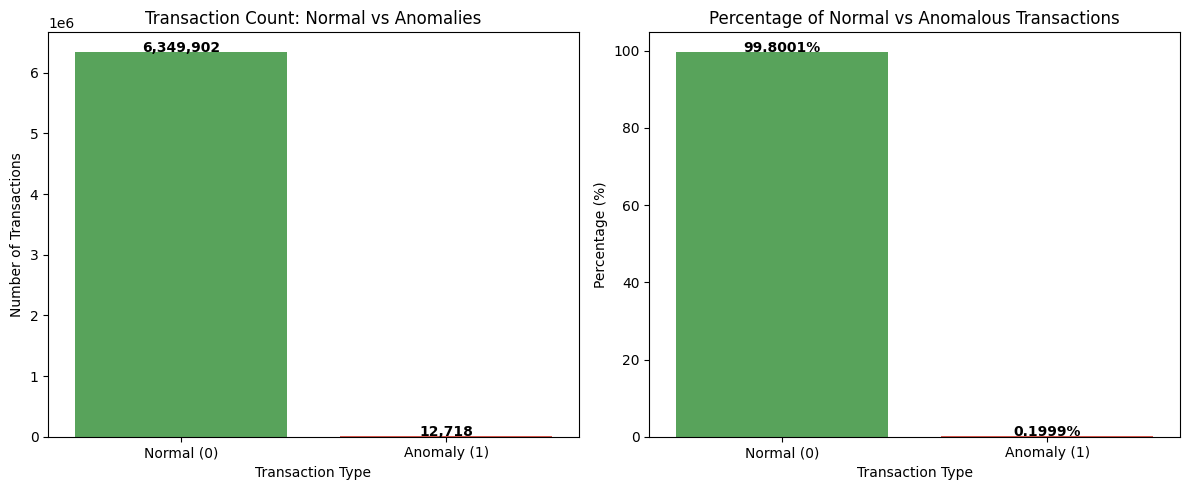

In [20]:
# Count the number of anomalies and normal transactions
counts = df['anomaly'].value_counts().sort_index()
labels = ['Normal (0)', 'Anomaly (1)']
total = len(df)

# Calculate percentage
percentages = (counts / total) * 100

plt.figure(figsize=(12,5))

#  Graph 1: Absolute Count 
plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=counts.values, palette=['#4CAF50', '#F44336'])
plt.title('Transaction Count: Normal vs Anomalies')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
for i, val in enumerate(counts.values):
    plt.text(i, val + 100, f'{val:,}', ha='center', fontsize=10, fontweight='bold')

#  Graph 2: Percentage 
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=percentages.values, palette=['#4CAF50', '#F44336'])
plt.title('Percentage of Normal vs Anomalous Transactions')
plt.ylabel('Percentage (%)')
plt.xlabel('Transaction Type')
for i, val in enumerate(percentages.values):
    plt.text(i, val + 0.02, f'{val:.4f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [21]:
suspicious = df[df['anomaly'] == 1]
print(suspicious[['step','type','amount','oldbalanceOrg','newbalanceOrig']])


         step  type       amount  oldbalanceOrg  newbalanceOrig
432         1     0    349505.89     7330235.59      7679741.48
636         1     0     90340.16     6067222.09      6157562.25
1731        1     0     66413.56     7197141.06      7263554.62
1818        1     4   2317408.88     4165916.16      1848507.28
2164        1     0     70139.43     6598328.65      6668468.08
...       ...   ...          ...            ...             ...
6362576   741     4  10000000.00    45674547.89     35674547.89
6362578   741     4  10000000.00    35674547.89     25674547.89
6362580   741     4  10000000.00    25674547.89     15674547.89
6362582   741     4  10000000.00    15674547.89      5674547.89
6362584   741     4   5674547.89     5674547.89      5674547.89

[12718 rows x 5 columns]


In [22]:
import joblib
joblib.dump(model, 'isolation_forest_paysim.pkl')
joblib.dump(scaler, 'scaler_paysim.pkl')


['scaler_paysim.pkl']